# 자연어 처리

In [1]:
from konlpy.tag import Kkma # konlpy.tag : Okt, Kkma
from konlpy.utils import pprint

kkma = Kkma()

pprint(kkma.sentences('네, 안녕하세요. 반갑습니다.'))
pprint(kkma.nouns('금요일 저녁에 치킨과 맥주를 먹어야지'))

pprint(kkma.pos('동사(動詞)는 문장에서 동작, 상태, 존재 등을 나타내는 품사입니다. 즉, 영어의 "verb"에 해당하는 단어입니다.'))

['네, 안녕하세요.', '반갑습니다.']
['금요일', '저녁', '치킨', '맥주']
[('동사', 'NNG'),
 ('(', 'SS'),
 ('動詞', 'OH'),
 (')', 'SS'),
 ('늘', 'VV'),
 ('ㄴ', 'ETD'),
 ('문장', 'NNG'),
 ('에서', 'JKM'),
 ('동작', 'NNG'),
 (',', 'SP'),
 ('상태', 'NNG'),
 (',', 'SP'),
 ('존재', 'NNG'),
 ('등', 'NNB'),
 ('을', 'JKO'),
 ('나타내', 'VV'),
 ('는', 'ETD'),
 ('품사', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('즉', 'MAG'),
 (',', 'SP'),
 ('영어', 'NNG'),
 ('의', 'JKG'),
 ('"', 'SS'),
 ('verb', 'OL'),
 ('"', 'SS'),
 ('에', 'JKM'),
 ('해당', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('단어', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]


In [2]:
from konlpy.tag import Okt # twitter dev

okt = Okt()

text = '동사(動詞)는 문장에서 동작, 상태, 존재 등을 나타내는 품사입니다. 즉, 영어의 "verb"에 해당하는 단어입니다.'

print(okt.morphs(text)) # 토큰
print(okt.pos(text)) # 토큰 + 품사
print(okt.nouns(text)) # 한글 명사만

['동사', '(', '動詞', ')', '는', '문장', '에서', '동작', ',', '상태', ',', '존재', '등', '을', '나타내는', '품사', '입니다', '.', '즉', ',', '영어', '의', '"', 'verb', '"', '에', '해당', '하는', '단어', '입니다', '.']
[('동사', 'Noun'), ('(', 'Punctuation'), ('動詞', 'Foreign'), (')', 'Punctuation'), ('는', 'Verb'), ('문장', 'Noun'), ('에서', 'Josa'), ('동작', 'Noun'), (',', 'Punctuation'), ('상태', 'Noun'), (',', 'Punctuation'), ('존재', 'Noun'), ('등', 'Noun'), ('을', 'Josa'), ('나타내는', 'Verb'), ('품사', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('즉', 'Noun'), (',', 'Punctuation'), ('영어', 'Noun'), ('의', 'Josa'), ('"', 'Punctuation'), ('verb', 'Alpha'), ('"', 'Punctuation'), ('에', 'Josa'), ('해당', 'Noun'), ('하는', 'Verb'), ('단어', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
['동사', '문장', '동작', '상태', '존재', '등', '품사', '즉', '영어', '해당', '단어']


In [3]:
text2 = '저녁에 뭐 먹으까ㅋㅋ'

print(okt.pos(text2))
print(okt.pos(text2, norm=True)) # 표준어로 변환(완전하지 않음)
print(okt.pos(text2, stem=True)) # 공통 동사로 변환

[('저녁', 'Noun'), ('에', 'Josa'), ('뭐', 'Noun'), ('먹으까', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('저녁', 'Noun'), ('에', 'Josa'), ('뭐', 'Noun'), ('먹으까', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]
[('저녁', 'Noun'), ('에', 'Josa'), ('뭐', 'Noun'), ('먹다', 'Verb'), ('ㅋㅋ', 'KoreanParticle')]


In [4]:
# kiwi

from kiwipiepy import Kiwi 

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"

for res in kiwi.tokenize(text) :
    if res.tag[0] == 'N': # 명사만 추출(N**)
        print(res.form, res.tag) # word(배달), pos(NNG)

print('--------신조어 분석--------')

text1 = '느좋'        

print(okt.pos(text1))
print(kkma.pos(text1))
print(kiwi.tokenize(text1))

배달 NNG
완료 NNG
나 NP
--------신조어 분석--------
[('느좋', 'Noun')]
[('느좋', 'UN')]
[Token(form='느좋', tag='NNG', start=0, len=2)]


In [5]:
# 정규 표현식

import re # regular expression

text = "오늘!!!!!!!!!!!!!!!!!! ㅇㅇ너무  hello  ㅗㅓ HELLO 010-7894-5798   기분 좋아^^ ㅎㅇㅎㅇ"
# 허용되는 걸 적고 나머지를 제외하는 방식
new_text = re.sub(r"[^0-9a-zA-Z가-힣+-]", "", text) # ^ : 아닌, \s : 공백
print(new_text)

오늘너무helloHELLO010-7894-5798기분좋아


In [6]:
import pandas as pd

# csv read시에 전처리 예시 참고
data = pd.read_csv('data/배달의민족댓글.csv', index_col=0).dropna().reset_index(drop=True)

data.to_csv('data/rv.csv')

In [7]:
# 데이터 전처리

# 목표: 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list에 담는 것
# 조건1: 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2: 불용어 제거(stopwords) - ex) 배달의 민족 분석시 : 배달/민족/조사

data = pd.read_csv('data/rv.csv')

word_list = []
stop_words = ['배달', '민족', '배민', '주문', '가게'] # 불용어

for i, review in enumerate(data['댓글'].tolist()):
    
    # 1. 정규표현식 정제
    re_review = re.sub(r'[^0-9a-zA-Z가-힣\s+-]', '', review) # 허용되는 내용(정규표현식 내용))만 남김

    # 2. 형태소 분석
    result = okt.nouns(re_review)

    for word in result:
        if len(word) > 1 and word not in stop_words:
            word_list.append(word)

In [8]:
# 단어수 세기

from collections import Counter

counter = Counter(word_list)
counter

Counter({'메뉴': 142,
         '시간': 124,
         '기능': 109,
         '고객': 107,
         '리뷰': 105,
         '사용': 101,
         '취소': 99,
         '음식': 99,
         '결제': 95,
         '어플': 92,
         '전화': 79,
         '검색': 77,
         '센터': 77,
         '다른': 71,
         '업데이트': 68,
         '이용': 67,
         '연결': 66,
         '쿠폰': 66,
         '계속': 61,
         '문제': 57,
         '다시': 55,
         '그냥': 55,
         '선택': 50,
         '진짜': 50,
         '생각': 49,
         '상담': 49,
         '하나': 47,
         '화면': 46,
         '확인': 46,
         '추가': 45,
         '요청': 43,
         '개선': 43,
         '매장': 42,
         '설정': 41,
         '기본': 39,
         '경우': 39,
         '식당': 38,
         '사항': 37,
         '사람': 37,
         '배차': 36,
         '삭제': 34,
         '라이더': 34,
         '서비스': 34,
         '포장': 33,
         '채팅': 33,
         '사진': 33,
         '알뜰': 32,
         '기사': 32,
         '지연': 31,
         '연락': 31,
         '정말': 30,
         '시스템': 30,
 

# 3) 워드 클라우드

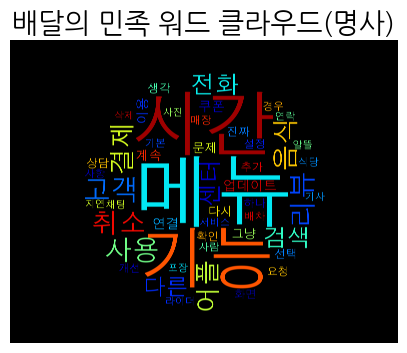

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import koreanize_matplotlib

import numpy as np
from PIL import Image

from wordcloud import WordCloud

circle_mask = np.array(Image.open(r'resources\circle.png'))

wc = WordCloud(
    font_path=r"C:\Windows\Fonts\H2GTRM.TTF",
    background_color="black", # white
    mask=circle_mask,
    colormap="jet", # https://www.kaggle.com/code/niteshhalai/wordcloud-colormap
    width=1200,
    height=1200,
    scale=10 # 결과 이미지의 해상도를 높히고 싶을때 
)

counter_dict = dict(counter.most_common(50))

wc.generate_from_frequencies(counter_dict)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(명사)", fontsize=20)
plt.show()

# search_font = 'gothic'

# for font in font_manager.findSystemFonts():
#     font_info = font_manager.FontProperties(fname=font)
#     font_name = font_info.get_name()
#     font_path = font_info.get_file()
#     if search_font in font_name.lower():
#         print(font_name, font_path)

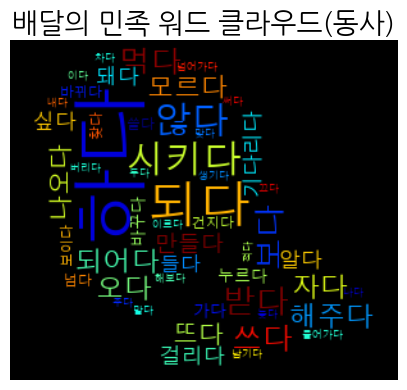

In [10]:
# 배달의 민족 동사에 대한 word cloud
# norm, stem 옵션 사용
# 새로운 mask 사용

data = pd.read_csv('data/rv.csv')

word_list = []

for review in data['댓글']:

    re_review = re.sub(r'[^0-9a-zA-Z가-힣\s+-]', '', review)

    result = okt.pos(re_review, norm=True, stem=True)
    
    for word, kind in result:
        if len(word) == 1:
            continue
        
        if kind == 'Verb':
            word_list.append(word)

from collections import Counter

counter = Counter(word_list)
most_counter = dict(counter.most_common(50))

image = np.array(Image.open(r'resources\doramp.png'))

wc = WordCloud(
    font_path=r"C:\Windows\Fonts\H2GTRM.TTF",
    background_color="black",
    mask=image,
    colormap="jet",
    width=1200,
    height=800,
    scale=1
)

wc.generate_from_frequencies(most_counter)

plt.figure(figsize=(5,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("배달의 민족 워드 클라우드(동사)", fontsize=20)
plt.show()
    


# 5) 검색

In [11]:
# 특정 단어가 포함된 문장 수집하여 분석

keyword = '취소'

review_list = []

# 검색1
for review in data:
    if(keyword in review):
        review_list.append(review)

# 검색2
data.loc[data['댓글'].str.contains(keyword),:]




,Unnamed: 0,댓글
0,0,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
14,14,편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워...
27,27,응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 ...
32,32,최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필...
33,33,최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키...
41,41,배민원에서 주문하고 배차가 한시간 넘게 걸린데서 취소요청하니 가게에 먼저 요청하고 ...
43,43,아니. 배달라이더가 안잡히면 가게 사장님들이 취소할 수 있도록 해놓던지. 배달 라이...
49,49,배달원 부족하면 애초에 주문이 어렵다 문구를 해놔야하는거 아니냐 뭔 옆동네에서 조리...
52,52,배빈1으로 1시간 넘게 음식을 못받았습니다. 고객센터도 연락 잘 안되고 잘 안되는 ...
68,68,상담사 연결 진짜 안되구요 유선연결은 고사하고 채팅상담도 안됩니다. 배달음식 시킨데...


### 3) 긍정어 분석

In [12]:
# 데이터 불러오기

data = pd.read_csv('data/appreply2.csv', index_col=0)

In [13]:
data['reaction'] = np.where(data['score'] >= 4, 1, 0)
data['reaction'].value_counts()

reaction
0    729
1    271
Name: count, dtype: int64

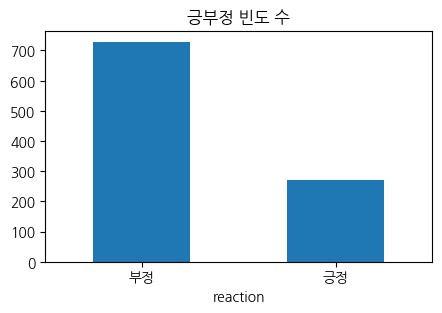

In [14]:
#시각화

import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib 

plt.figure(figsize=(5,3))
data["reaction"].value_counts().plot(kind="bar")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

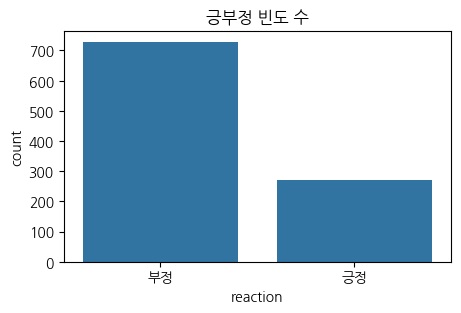

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(data=data, x="reaction")
plt.title("긍부정 빈도 수")
plt.xticks(ticks=[0, 1], labels=["부정", "긍정"], rotation=0)
plt.show()

In [16]:
# 긍부정 데이터 분석
positive_rv = data.loc[data['reaction']==1, :]
negative_rv = data.loc[data['reaction']==0, :]

In [17]:
def get_word_list(data, stopwords):
    """리뷰 데이터프레임과 불용어 리스트를 입력하면 word_list를 반환해주는 함수"""
    word_list = []

    for i, review in enumerate(data["text"].tolist()):
        # STEP1: 데이터 전처리
        new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)
        # STEP2: 형태소 분석
        result = okt.nouns(new_review)
        # STEP3: 조건에 맞는 단어 담기
        for word in result:
            if len(word) > 1 and word not in stopwords:
                word_list.append(word)
        ### 출력 메세지 ###
        print(f"{i}번째 리뷰: {new_review}")
    return word_list

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_33104\1303583307.py:7: SyntaxWarning: invalid escape sequence '\s'
  new_review = re.sub("[^a-zA-Z가-힣\s]", "", review)


In [18]:
stopwords = ['배민', '민족', '배달', '메뉴']

po_word_list = get_word_list(positive_rv, stopwords)
ne_word_list = get_word_list(negative_rv, stopwords)

0번째 리뷰: 배달의민족 주문시 리뷰를 자주 참고하는 편입니다 한가지 건의사항이 있다면 최신순별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다 긍정적으로 검토해주심 좋을 것 같습니다
1번째 리뷰: 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요 먹던 메뉴도 검색가능했으면 좋겠어요 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 
2번째 리뷰: 앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우 혹은 나중에 입력 선택 후 주문 결제 시 받을 주소를 설정하는 것으로 순서를 변경하면 어떨까요 저는 필요할 때만 어플을 설치해서 삭제 설치를 자주 하는 편인데요 다시 사용하려고 재설치하고 실행하면 회원정보에 주소 저장을 해놨음에도 어플 실행하면 로그인 여부 안 물어보고 주소를 다시 설정해야해서 불편해요  처음에 주소를 설정해도 주문할 때 어차피 로그인할 건데 시간이 매번 추가로 드네요 저같이 어플을 사용하는 사람이 많지는 않겠지만 혹시 굳이 주문도 하지 않은 상태에서 주소부터 설정하는 이유가 따로 있을까요 수정하기 어려운 사항이라면 제가 그냥 어플을 삭제하지 않고 사용하겠지만 순서를 바꾸는 정도라면 어렵지 않을 거 같고 사용자로서 굳이 주소부터 설정할 필요가 없을 거 같아서 의견 남겨봅니다 어떨까요
3번째 리뷰: 안녕하세요 배민 잘 이용하는 사용자입니다 한 가지 건의사항이 있는데요 받아들여지지는 않겠지만 리뷰에 별점 대신 재방문 수를 표시하면 어떨까 싶기도 하여 이렇게 달아봅니다 아니면 별점 옆에 재방문 수를 표시해도 좋을 것 같다 생각합니다 혹시 건의사항을 따로 

In [19]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import koreanize_matplotlib
from PIL import Image 
import numpy as np 
from collections import Counter

def draw_wordcloud(word_list, title):
    """word_list를 받으면 Counter로 빈도 수를 센 후 워드 클라우드를 그리고 counter를 반환하는 함수"""
    counter = Counter(word_list)
    
    ## (한번 해보기) Mask로 내가 원하는 모양으로 만들어보기
    image = Image.open(r"resources/circle.png")
    mask_img = np.array(image)

    wc = WordCloud(
        font_path = r"C:\Windodws\Fonts\malgun.ttf",
        mask=mask_img,
        background_color="black",
        colormap="jet",    
        width=800,
        height=400
    )

    ## (한번 해보기) 가장 많이 발생한 50개만 워드 클라우드로 그려보기
    wc.generate_from_frequencies(dict(counter.most_common(50)))

    plt.figure(figsize=(5,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=15)
    plt.show()

    return counter

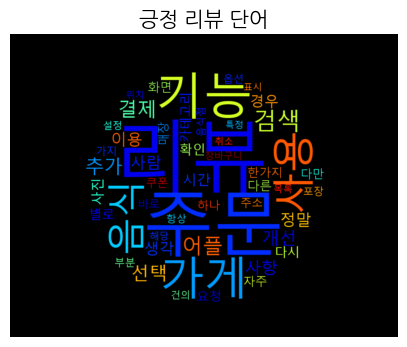

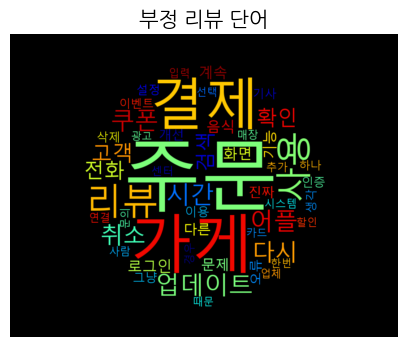

In [20]:
counter = draw_wordcloud(po_word_list, title='긍정 리뷰 단어')
counter = draw_wordcloud(ne_word_list, title='부정 리뷰 단어')

# 2. 장바구니 분석 - 단어간의 조합/관련성 탐색
### 연관성 규칙 분석(기저귀 - 맥주)

In [21]:
data = pd.read_csv("data/appreply2.csv", index_col=0)
data.head()

,text,score
0,"배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...",4
1,내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...,5
2,"검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...",1
3,배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...,2
4,최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...,3


In [22]:
# 1. [[],[],[]] 형태로 담기

main_list = []

for rv in data['text']:
    sub_list = []

    re_rv = re.sub(r'[^0-9a-zA-Z가-힣\s+-]', '', rv)

    noun_list = okt.nouns(re_rv)
    
    for word in noun_list:
        if len(word) > 1:
            sub_list.append(word)

    main_list.append(sub_list)

In [23]:
# 2. 분석 가능한 형태로 단어 목록 변환(T/F)

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

# main_list = [
#     ["밥", "국", "김치"],
#     ["밥", "국"],
#     ["밥", "김치"],
#     ["라면", "김치"],
#     ["밥", "반찬"],
#     ["국", "김치"]
# ]

,가게,가격,가계,가공,가관,가구,가기,가까스로,가까윤,가까이,...,휴대전화,휴대폰,휴대폰결제,휴먼,휴면,휴업,흐릿,희망,흰색,히어로
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
996,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [24]:
# 단어들의 등장확률 계산

# 최소 0.05 이상, 연관단어 2개까지만
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True, max_len=2)
frequent_itemsets

,support,itemsets
0,0.208,(가게)
1,0.102,(개선)
2,0.111,(검색)
3,0.115,(결제)
4,0.076,(경우)
...,...,...
81,0.052,"(시간, 주문)"
82,0.050,"(어플, 주문)"
83,0.057,"(음식, 주문)"
84,0.061,"(전화, 주문)"


* support: $P(A\cap B)$
* confidence: $P(B|A)=\dfrac{P(A\cap B)}{P(A)}$
* lift: $\dfrac{P(B|A)}{P(B)}$

In [25]:
# 단어간의 연관관계 분석

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
# A / B / 교집합 / A가 있을 때 B가 있을 비율(순서 x) / 1이상이면 A가 발생해야 B가 발생(유의미) - (순서 x)

,antecedents,consequents,support,confidence,lift
0,(기능),(가게),0.061,0.369697,1.777389
1,(가게),(기능),0.061,0.293269,1.777389
2,(리뷰),(가게),0.054,0.278351,1.338224
3,(가게),(리뷰),0.054,0.259615,1.338224
4,(메뉴),(가게),0.063,0.351955,1.692093
...,...,...,...,...,...
65,(주문),(음식),0.057,0.183280,1.347645
66,(전화),(주문),0.061,0.685393,2.203837
67,(주문),(전화),0.061,0.196141,2.203837
68,(취소),(주문),0.052,0.732394,2.354966


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ",".join(sorted(list(x))))
rules["consequents_str"] = rules["consequents"].apply(lambda x: ",".join(sorted(list(x))))

rules[["antecedents_str", "consequents_str", "support", "confidence", "lift"]]

,antecedents_str,consequents_str,support,confidence,lift
0,기능,가게,0.061,0.369697,1.777389
1,가게,기능,0.061,0.293269,1.777389
2,리뷰,가게,0.054,0.278351,1.338224
3,가게,리뷰,0.054,0.259615,1.338224
4,메뉴,가게,0.063,0.351955,1.692093
...,...,...,...,...,...
65,주문,음식,0.057,0.183280,1.347645
66,전화,주문,0.061,0.685393,2.203837
67,주문,전화,0.061,0.196141,2.203837
68,취소,주문,0.052,0.732394,2.354966


In [27]:
pivot_data = rules.pivot_table(
    index="antecedents_str",
    columns="consequents_str",
    values="lift", # 'confidence'
    fill_value=0
)
pivot_data

consequents_str,가게,결제,고객,기능,다른,리뷰,메뉴,민족,배달,배민,사용,센터,시간,어플,음식,전화,주문,취소,쿠폰
antecedents_str,,,,,,,,,,,,,,,,,,,
가게,0.000000,0.000000,0.000000,1.777389,0.000000,1.338224,1.692093,0.000000,1.196435,1.114510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.329458,0.000000,0.000000
결제,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.453935,0.000000,0.000000
고객,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.656436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
기능,1.777389,0.000000,0.000000,0.000000,0.000000,1.749453,1.929914,0.000000,1.023938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.344636,0.000000,0.000000
다른,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.231086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
리뷰,1.338224,0.000000,0.000000,1.749453,0.000000,0.000000,2.505327,0.000000,0.000000,1.194939,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.176783,0.000000,0.000000
메뉴,1.692093,0.000000,0.000000,1.929914,0.000000,2.505327,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.167616,0.000000,0.000000
민족,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.283105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
배달,1.196435,0.000000,0.000000,1.023938,1.231086,0.000000,0.000000,2.283105,0.000000,1.141553,1.091920,0.000000,1.391607,1.202435,1.426941,1.282643,1.145223,0.000000,1.174168


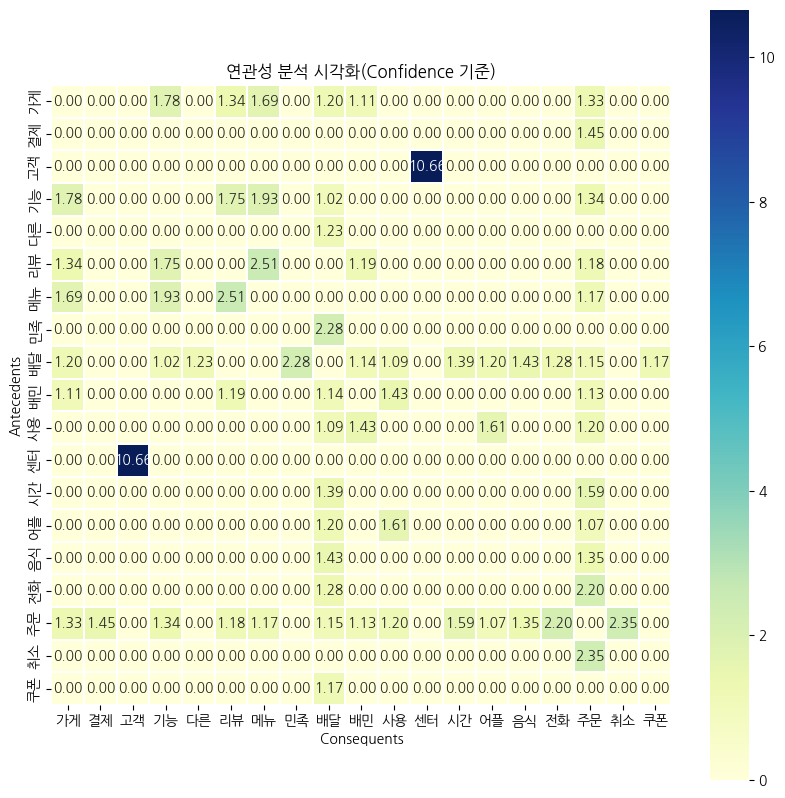

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Confidence 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

# 네트워크 분석

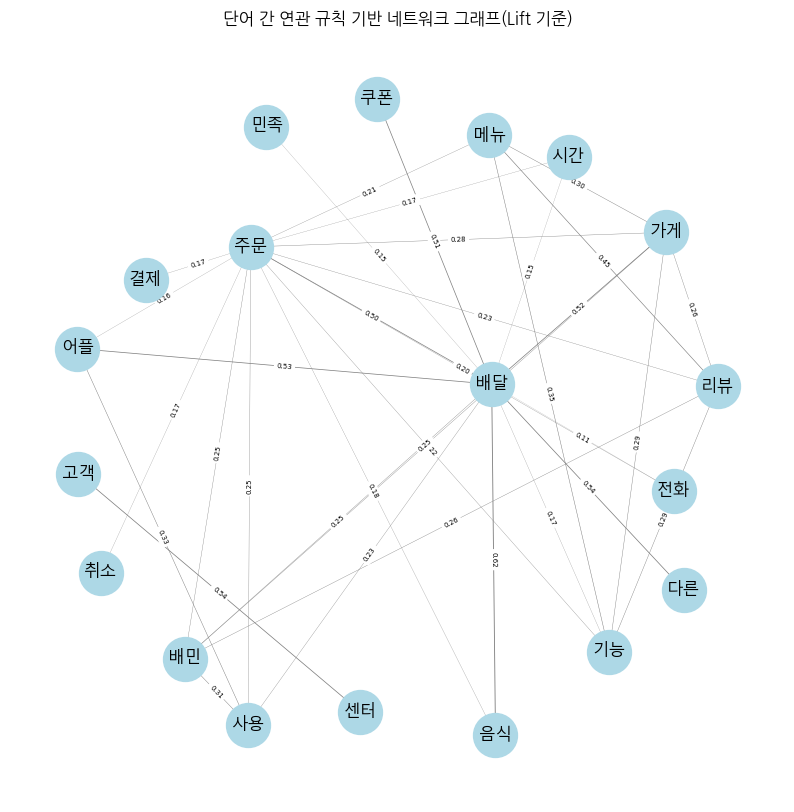

In [30]:
import networkx as nx
import matplotlib.pyplot as plt 
import koreanize_matplotlib 

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, row in rules.iterrows():
    # 단어 추출
    antecedent = ",".join(row["antecedents"])
    consequent = ",".join(row["consequents"])
    weight = row["confidence"]

    # 노드 추가
    G.add_edge(antecedent, consequent, weight=weight)

# 3. 노드 배치
# pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, seed=13, k=2) # k가 노드간 분산되게 해줌

# 4. 가중치 추출 
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]

# 5. 노드 스타일 지정 및 그리기
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1000) # 점
nx.draw_networkx_edges(G, pos, edge_color="gray", width=edge_weights) # 선
nx.draw_networkx_labels(G, pos, font_size=12, font_family="Malgun Gothic")

edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()    

# 인코딩(데이터를 지정한 숫자 데이터로 변환)
uv add scikit-learn

### 정수 인코딩(단어 하나마다 정수 하나) - label encoder

In [31]:
sentences =[
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 어제 기분이 나빴다",
    "집에 가고 싶다"
]

# sentences를 스페이스 기준으로 쪼갠다. 
# 그 단어들의 집합을 만든다. 
tokens = []

for sent in sentences:
    temp = sent.split()
    tokens.extend(temp)

token_set = set(tokens)


# 문자마다 각 index 번호를 생성하기 위함
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(list(token_set))
print(encoded) # [1 3 0 5 2 4 6]
print(label_encoder.classes_)


# 라벨링한 단어들을 dict로 변환
mydict = {}

for key, value in enumerate(label_encoder.classes_):
    mydict[int(key)] = str(value)

print(mydict)

# encoding 파악
label_encoder.transform(['나는', '기분이', '나빴다'])

[6 5 7 1 8 4 2 3 9 0]
['가고' '기분이' '나는' '나빴다' '날씨가' '싶다' '어제' '오늘' '좋다' '집에']
{0: '가고', 1: '기분이', 2: '나는', 3: '나빴다', 4: '날씨가', 5: '싶다', 6: '어제', 7: '오늘', 8: '좋다', 9: '집에'}


array([2, 1, 3])

### 원-핫 인코딩(단어 하나가 한라인)

In [32]:
from sklearn.preprocessing import OneHotEncoder 
import numpy as np 

tokens_numpy = np.array(list(token_set))
print(tokens_numpy)

print('='*50)

tokens_arr = tokens_numpy.reshape(-1, 1)
print(tokens_arr)

print('='*50)

oh_encoder = OneHotEncoder()
encoded = oh_encoder.fit_transform(tokens_arr)
print(encoded.toarray())

print('='*50)

print(oh_encoder.categories_)

['어제' '싶다' '오늘' '기분이' '좋다' '날씨가' '나는' '나빴다' '집에' '가고']
[['어제']
 ['싶다']
 ['오늘']
 ['기분이']
 ['좋다']
 ['날씨가']
 ['나는']
 ['나빴다']
 ['집에']
 ['가고']]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[array(['가고', '기분이', '나는', '나빴다', '날씨가', '싶다', '어제', '오늘', '좋다', '집에'],
      dtype='<U3')]


# 벡터라이징

### BoW(Bag of Words)

In [34]:
sentences

mydict = {}

for sent in sentences:
    for word in sent.split():
        if word in mydict:
            mydict[word] += 1
        else:
            mydict[word] = 1

print(mydict)

{'나는': 2, '오늘': 2, '기분이': 2, '좋다': 2, '날씨가': 1, '어제': 1, '나빴다': 1, '집에': 1, '가고': 1, '싶다': 1}


In [35]:
from sklearn.feature_extraction.text import CountVectorizer 

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)

print(vectorizer.vocabulary_) # 숫자가 빈도가 아니라 단어의 고유 번호
print(bow_matrix.toarray()) # 해당 단어의 갯수 표현

# [[1 1 0 0 0 1 1] 나는(1) 오늘(5) 기분이(0) 좋다(6)
#  [0 0 0 1 0 1 1]
#  [1 1 1 0 1 0 0]]

{'나는': 2, '오늘': 7, '기분이': 1, '좋다': 8, '날씨가': 4, '어제': 6, '나빴다': 3, '집에': 9, '가고': 0, '싶다': 5}
[[0 1 1 0 0 0 0 1 1 0]
 [0 0 0 0 1 0 0 1 1 0]
 [0 1 1 1 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 0 0 1]]


### TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(tfidf_matrix.toarray())

{'나는': 2, '오늘': 7, '기분이': 1, '좋다': 8, '날씨가': 4, '어제': 6, '나빴다': 3, '집에': 9, '가고': 0, '싶다': 5}
[[0.         0.5        0.5        0.         0.         0.
  0.         0.5        0.5        0.        ]
 [0.         0.         0.         0.         0.66767854 0.
  0.         0.52640543 0.52640543 0.        ]
 [0.         0.43779123 0.43779123 0.55528266 0.         0.
  0.55528266 0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.57735027
  0.         0.         0.         0.57735027]]


### 유사도 분석

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(similarity) # 코사인 유사도 점수 1일수록 가까움(추천 시스템에 활용)
# \ 대각선으로 같은 문장 유사도 : 1, [0,1] => 1번 문장과 2번 문장의 유사도


[[1.         0.52640543 0.43779123 0.        ]
 [0.52640543 1.         0.         0.        ]
 [0.43779123 0.         1.         0.        ]
 [0.         0.         0.         1.        ]]
